In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [2]:
### Linear Regression

In [3]:
data = pd.read_csv("advertising.csv")
data.sample(10)

,TV,Radio,Newspaper,Sales
63,102.7,29.6,8.4,14.0
82,75.3,20.3,32.5,11.3
156,93.9,43.5,50.5,15.3
185,205.0,45.1,19.6,22.6
158,11.7,36.9,45.2,7.3
52,216.4,41.7,39.6,22.6
182,56.2,5.7,29.7,8.7
130,0.7,39.6,8.7,1.6
143,104.6,5.7,34.4,10.4
38,43.1,26.7,35.1,10.1


In [4]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [5]:
X, y = data[['TV', 'Radio', 'Newspaper']], data['Sales']
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [6]:
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [7]:
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)
y_norm = scaler.fit_transform(y.values.reshape(-1, 1))

In [8]:
X_norm[:5], y_norm[:5]

(array([[0.77578627, 0.76209677, 0.60598065],
        [0.1481231 , 0.79233871, 0.39401935],
        [0.0557998 , 0.92540323, 0.60686016],
        [0.50997633, 0.83266129, 0.51187335],
        [0.60906324, 0.21774194, 0.51099384]]),
 array([[0.80708661],
        [0.34645669],
        [0.40944882],
        [0.58661417],
        [0.64173228]]))

In [9]:
train_split = int(0.85 * len(data))
X_train, X_val = X_norm[:train_split], X_norm[train_split:]
y_train, y_val = y_norm[:train_split], y_norm[train_split:]

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((170, 3), (30, 3), (170, 1), (30, 1))

In [10]:
LinearRegressionV1 = LinearRegression().fit(X_train, y_train)

In [11]:
LinearRegressionV1.score(X_train, y_train)

0.9003829550614623

In [12]:
y_perd = LinearRegressionV1.predict(X_val)
y_perd

array([[0.27135673],
       [0.55888557],
       [0.2409764 ],
       [0.50745078],
       [0.60851327],
       [0.91680504],
       [0.77621641],
       [0.51592903],
       [0.72178291],
       [0.51380416],
       [0.4630199 ],
       [0.60948365],
       [0.26111129],
       [0.91767424],
       [0.75168655],
       [0.74440807],
       [0.42547855],
       [0.64634435],
       [0.78840946],
       [0.20635052],
       [0.37009039],
       [0.32205839],
       [0.17056785],
       [0.64801364],
       [0.58480462],
       [0.21282065],
       [0.33805633],
       [0.53462288],
       [0.90448294],
       [0.65064665]])

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_val, y_perd)
r2 = r2_score(y_val, y_perd)

mse, r2

(0.004435455043519201, 0.9100791189160852)

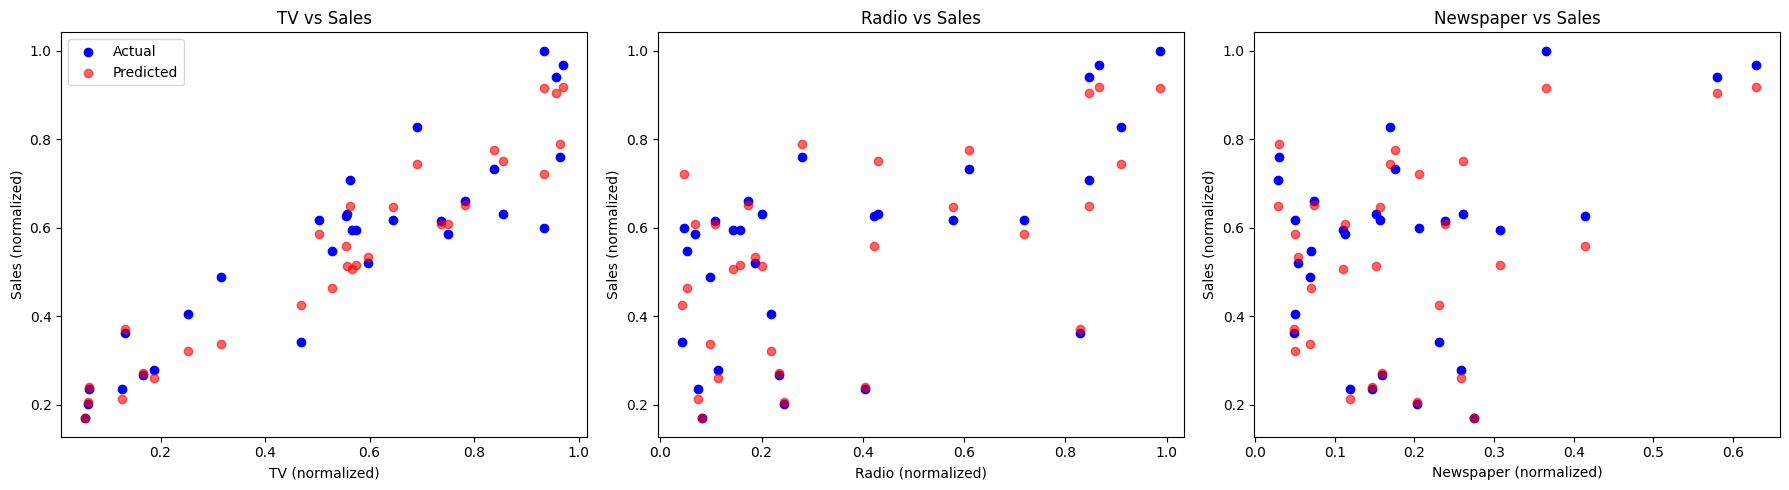

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

feature_names = ['TV', 'Radio', 'Newspaper']
for i, ax in enumerate(axs):
    ax.scatter(X_val[:, i], y_val, color='blue', label='Actual')
    ax.scatter(X_val[:, i], y_perd, color='red', label='Predicted', alpha=0.6)
    ax.set_xlabel(f'{feature_names[i]} (normalized)')
    ax.set_ylabel('Sales (normalized)')
    ax.set_title(f'{feature_names[i]} vs Sales')
    if i == 0:
        ax.legend()

plt.tight_layout()
plt.show()

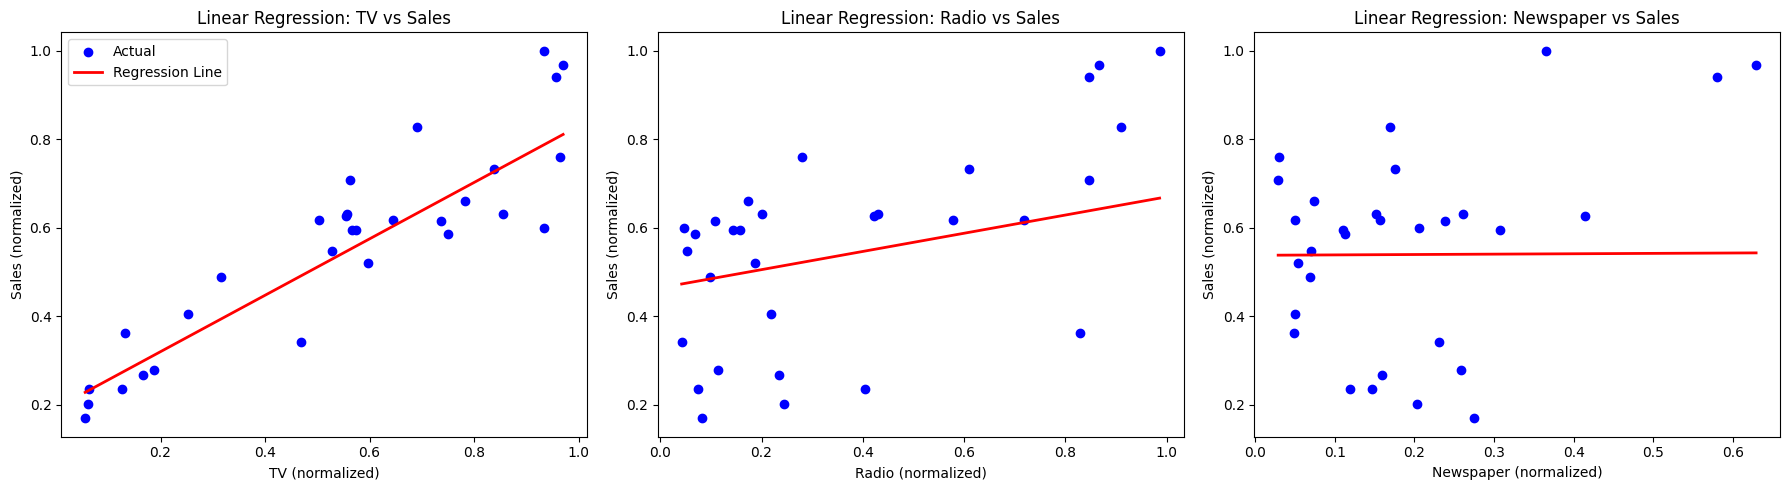

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

feature_names = ['TV', 'Radio', 'Newspaper']

for i, ax in enumerate(axs):
    # Scatter actual points
    ax.scatter(X_val[:, i], y_val, color='blue', label='Actual')
    
    # Create 100 points for the current feature
    x_line = np.linspace(X_val[:, i].min(), X_val[:, i].max(), 100)
    
    # Create new X values: other features set to mean of validation set
    X_line = np.ones((100, X_val.shape[1])) * X_val.mean(axis=0)
    X_line[:, i] = x_line
    
    # Predict
    y_line = LinearRegressionV1.predict(X_line)
    
    # Plot regression line
    ax.plot(x_line, y_line, color='red', linewidth=2, label='Regression Line')
    
    ax.set_xlabel(f'{feature_names[i]} (normalized)')
    ax.set_ylabel('Sales (normalized)')
    ax.set_title(f'Linear Regression: {feature_names[i]} vs Sales')
    if i == 0:
        ax.legend()

plt.tight_layout()
plt.show()


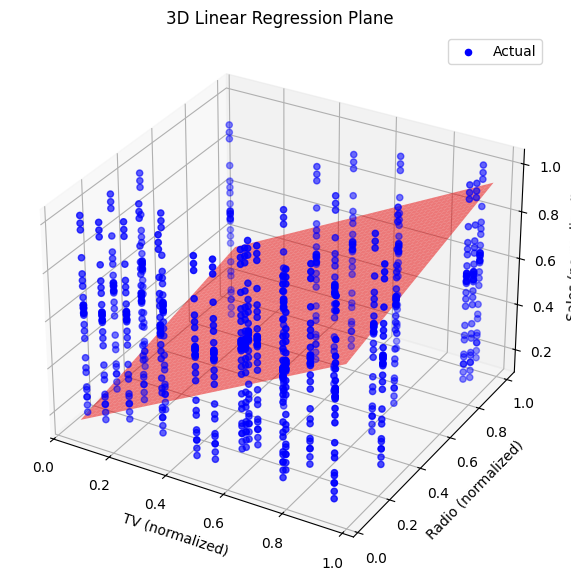

In [16]:
from mpl_toolkits.mplot3d import Axes3D

# Fix Newspaper at mean value
newspaper_mean = X_val[:, 2].mean()

# Create grid for TV and Radio
tv = np.linspace(X_val[:, 0].min(), X_val[:, 0].max(), 50)
radio = np.linspace(X_val[:, 1].min(), X_val[:, 1].max(), 50)
TV_grid, Radio_grid = np.meshgrid(tv, radio)

# Flatten the grid to pass into the model
X_grid = np.zeros((TV_grid.size, 3))
X_grid[:, 0] = TV_grid.ravel()       # TV
X_grid[:, 1] = Radio_grid.ravel()    # Radio
X_grid[:, 2] = newspaper_mean        # Newspaper fixed

# Predict
y_grid = LinearRegressionV1.predict(X_grid).reshape(TV_grid.shape)

# Plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Plot regression plane
ax.plot_surface(TV_grid, Radio_grid, y_grid, color='red', alpha=0.5)

# Plot actual validation points
ax.scatter(X_val[:, 0], X_val[:, 1], y_val, color='blue', label='Actual')

ax.set_xlabel('TV (normalized)')
ax.set_ylabel('Radio (normalized)')
ax.set_zlabel('Sales (normalized)')
ax.set_title('3D Linear Regression Plane')
ax.legend()

plt.show()


### **Lasso Regression**

In [17]:
data = pd.read_csv("advertising.csv")
data.sample(10)

,TV,Radio,Newspaper,Sales
186,139.5,2.1,26.6,10.3
12,23.8,35.1,65.9,9.2
106,25.0,11.0,29.7,7.2
75,16.9,43.7,89.4,8.7
94,107.4,14.0,10.9,11.5
188,286.0,13.9,3.7,20.9
105,137.9,46.4,59.0,15.0
120,141.3,26.8,46.2,15.5
154,187.8,21.1,9.5,20.6
90,134.3,4.9,9.3,14.0


In [18]:
X, y = data[['TV', 'Radio', 'Newspaper']], data['Sales']

In [19]:
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)
y_norm = scaler.fit_transform(y.values.reshape(-1, 1))

In [20]:
X_norm[:5], y_norm[:5]

(array([[0.77578627, 0.76209677, 0.60598065],
        [0.1481231 , 0.79233871, 0.39401935],
        [0.0557998 , 0.92540323, 0.60686016],
        [0.50997633, 0.83266129, 0.51187335],
        [0.60906324, 0.21774194, 0.51099384]]),
 array([[0.80708661],
        [0.34645669],
        [0.40944882],
        [0.58661417],
        [0.64173228]]))

In [21]:
train_split = int(0.85 * len(data))
X_train, X_val = X_norm[:train_split], X_norm[train_split:]
y_train, y_val = y_norm[:train_split], y_norm[train_split:]

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((170, 3), (30, 3), (170, 1), (30, 1))

In [22]:
from sklearn.linear_model import LassoCV
LassoCV = LassoCV(alphas=[0.01, 0.1, 1, 10], cv=5, random_state=0)
LassoCV.fit(X_train, y_train)


/home/rthvk03/miniconda3/envs/common_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:1714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,eps,0.001
,n_alphas,'deprecated'
,alphas,"[0.01, 0.1, ...]"
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


In [23]:
LassoCV.alpha_

np.float64(0.01)

In [29]:
from sklearn.linear_model import Lasso
LassoV1 = Lasso(alpha=0.01, random_state=42)
LassoV1.fit(X_train, y_train)

,alpha,0.01
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,42
,selection,'cyclic'


In [30]:
LassoV1.score(X_train, y_train)

0.8444741757155642

In [31]:
y_pred = LassoV1.predict(X_val)
y_pred

array([0.33888146, 0.55707519, 0.30155842, 0.53798583, 0.62569814,
       0.80671941, 0.72162626, 0.54245638, 0.718821  , 0.5385256 ,
       0.50884591, 0.62261875, 0.33866586, 0.81439244, 0.71437211,
       0.67353758, 0.47792977, 0.61835967, 0.75691718, 0.28495102,
       0.37589655, 0.38208071, 0.26729182, 0.6007479 , 0.55874738,
       0.30335393, 0.40377797, 0.55719503, 0.80550162, 0.6524718 ])

In [32]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
mse, r2

(0.007454552537285793, 0.848872342147059)

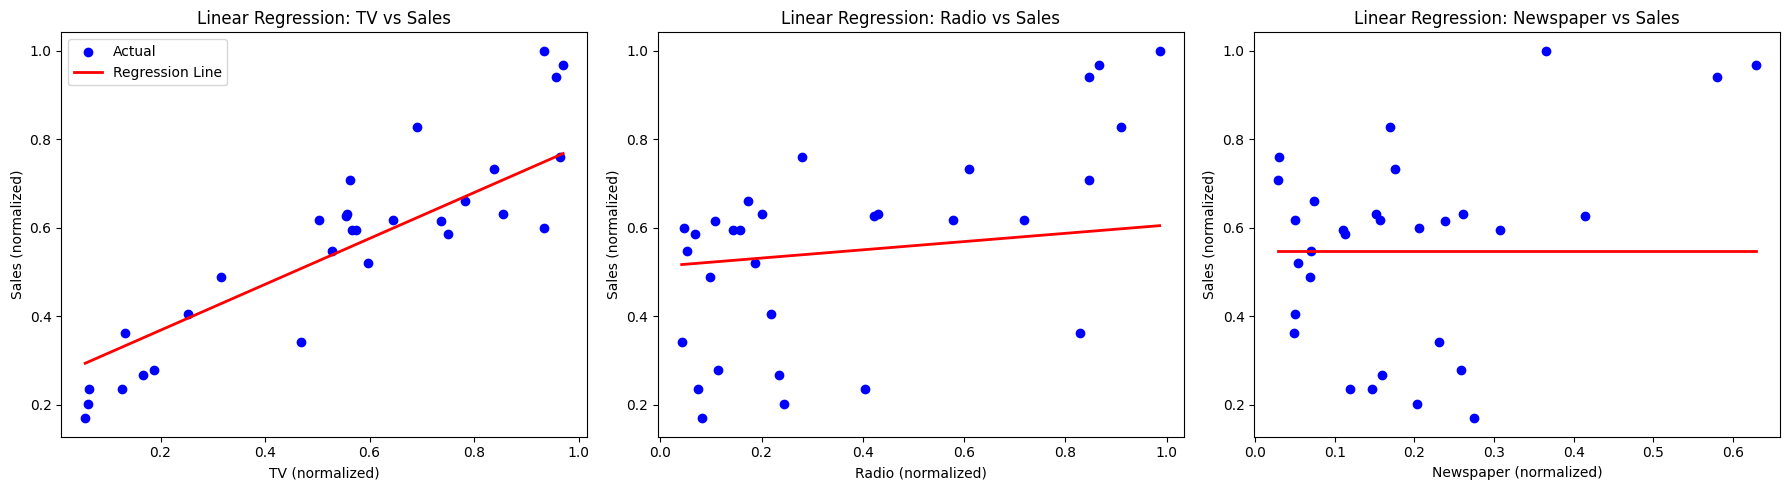

In [33]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

feature_names = ['TV', 'Radio', 'Newspaper']

for i, ax in enumerate(axs):
    # Scatter actual points
    ax.scatter(X_val[:, i], y_val, color='blue', label='Actual')
    
    # Create 100 points for the current feature
    x_line = np.linspace(X_val[:, i].min(), X_val[:, i].max(), 100)
    
    # Create new X values: other features set to mean of validation set
    X_line = np.ones((100, X_val.shape[1])) * X_val.mean(axis=0)
    X_line[:, i] = x_line
    
    # Predict
    y_line = LassoV1.predict(X_line)
    
    # Plot regression line
    ax.plot(x_line, y_line, color='red', linewidth=2, label='Regression Line')
    
    ax.set_xlabel(f'{feature_names[i]} (normalized)')
    ax.set_ylabel('Sales (normalized)')
    ax.set_title(f'Linear Regression: {feature_names[i]} vs Sales')
    if i == 0:
        ax.legend()

plt.tight_layout()
plt.show()


### **Ridge Regression**

In [34]:
data = pd.read_csv("advertising.csv")
data.sample(10)

,TV,Radio,Newspaper,Sales
63,102.7,29.6,8.4,14.0
110,225.8,8.2,56.5,18.4
159,131.7,18.4,34.6,12.9
105,137.9,46.4,59.0,15.0
69,216.8,43.9,27.2,22.3
11,214.7,24.0,4.0,17.4
92,217.7,33.5,59.0,19.4
97,184.9,21.0,22.0,20.5
166,17.9,37.6,21.6,8.0
5,8.7,48.9,75.0,7.2


In [35]:
X, y = data[['TV', 'Radio', 'Newspaper']], data['Sales']

In [36]:
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)
y_norm = scaler.fit_transform(y.values.reshape(-1, 1))

In [37]:
X_norm[:5], y_norm[:5]

(array([[0.77578627, 0.76209677, 0.60598065],
        [0.1481231 , 0.79233871, 0.39401935],
        [0.0557998 , 0.92540323, 0.60686016],
        [0.50997633, 0.83266129, 0.51187335],
        [0.60906324, 0.21774194, 0.51099384]]),
 array([[0.80708661],
        [0.34645669],
        [0.40944882],
        [0.58661417],
        [0.64173228]]))

In [38]:
train_split = int(0.85 * len(data))
X_train, X_val = X_norm[:train_split], X_norm[train_split:]
y_train, y_val = y_norm[:train_split], y_norm[train_split:]

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((170, 3), (30, 3), (170, 1), (30, 1))

In [39]:
from sklearn.linear_model import Ridge
RidgeV1 = Ridge(alpha=0.01, random_state=42)
RidgeV1.fit(X_train, y_train)

,alpha,0.01
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,42


In [41]:
RidgeV1.score(X_train, y_train)

0.9003825061671528

In [42]:
y_pred = RidgeV1.predict(X_val)
y_pred

array([0.27152969, 0.55887675, 0.24116862, 0.50745202, 0.60844345,
       0.91653341, 0.77602962, 0.51594252, 0.72164146, 0.51380441,
       0.46304964, 0.60942461, 0.26130163, 0.91742744, 0.75152639,
       0.74424124, 0.42555005, 0.64624832, 0.78820264, 0.20657371,
       0.37017876, 0.32218526, 0.1708243 , 0.6479026 , 0.58474135,
       0.21303253, 0.33817437, 0.53459925, 0.90424105, 0.65054256])

In [43]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
mse, r2

(0.004434287872727083, 0.9101027812066445)

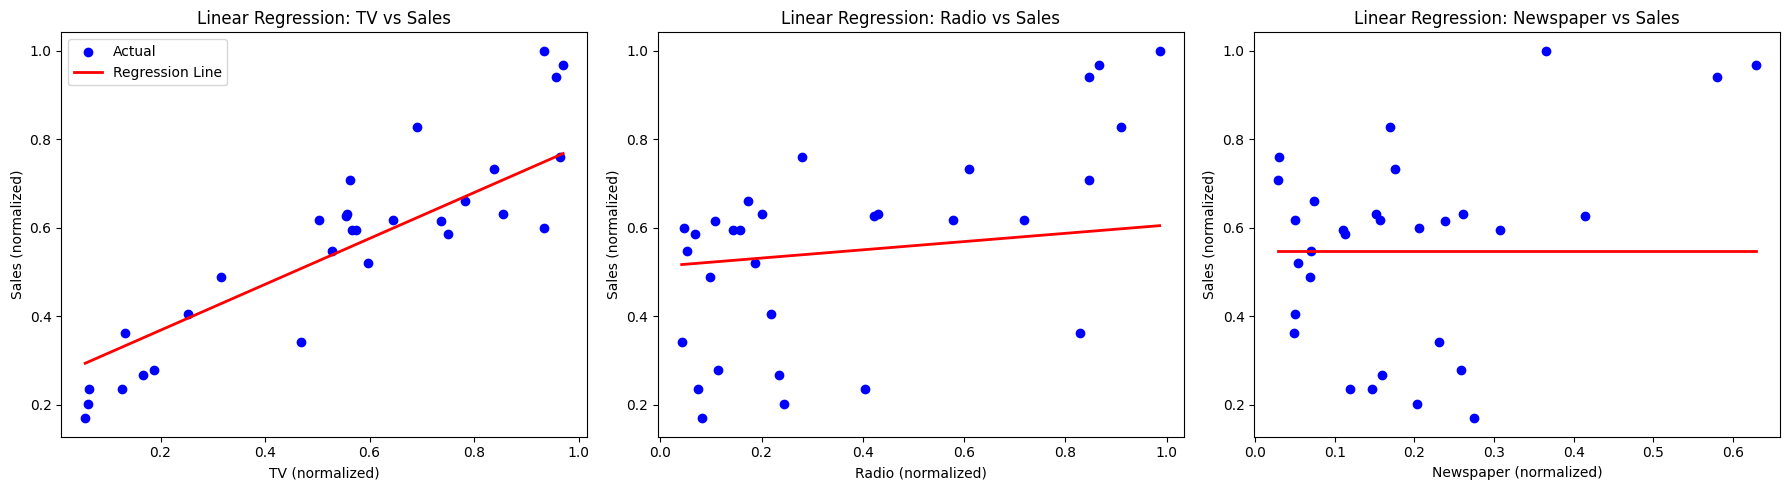

In [44]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

feature_names = ['TV', 'Radio', 'Newspaper']

for i, ax in enumerate(axs):
    # Scatter actual points
    ax.scatter(X_val[:, i], y_val, color='blue', label='Actual')
    
    # Create 100 points for the current feature
    x_line = np.linspace(X_val[:, i].min(), X_val[:, i].max(), 100)
    
    # Create new X values: other features set to mean of validation set
    X_line = np.ones((100, X_val.shape[1])) * X_val.mean(axis=0)
    X_line[:, i] = x_line
    
    # Predict
    y_line = LassoV1.predict(X_line)
    
    # Plot regression line
    ax.plot(x_line, y_line, color='red', linewidth=2, label='Regression Line')
    
    ax.set_xlabel(f'{feature_names[i]} (normalized)')
    ax.set_ylabel('Sales (normalized)')
    ax.set_title(f'Linear Regression: {feature_names[i]} vs Sales')
    if i == 0:
        ax.legend()

plt.tight_layout()
plt.show()
